# Clipping Functions 
This notebook aims to help gain a better understanding of clipping functions and how they're used in deep neural networks

## Definition of Clipping Function 
A clipping function is a function that clips/modifies a part of an input into another value. It has the same basis as activation functions and activation functions such as the ReLU function can also be described as clipping functions

### Imports 
Import the libraries needed to define a deep neural network and a clipping function as well as a library to plot the output and the intermediate steps of the deep neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define Clipping Function
Define the Rectified Linear Unit (ReLU) function as the clipping function for this deep neural network

In [2]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Define Deep Neural Network 
Define a deep neural network as a neural network with one input, one output, two hidden layers, and three hidden units

In [3]:
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # Preactivations at layer 1 
  layer1_pre_1 = theta[1, 0] + theta[1, 1]*x
  layer1_pre_2 = theta[2, 0] + theta[2, 1]*x
  layer1_pre_3 = theta[3, 0] + theta[3, 1]*x

  # Activation functions 
  h1 = activation_fn(layer1_pre_1)
  h2 = activation_fn(layer1_pre_2)
  h3 = activation_fn(layer1_pre_3)

  # Preactivations at layer 2 
  layer2_pre_1 = psi[1, 0] + psi[1, 1]*h1 + psi[1, 2]*h2 + psi[1, 3]*h3
  layer2_pre_2 = psi[2, 0] + psi[2, 1]*h1 + psi[2, 2]*h2 + psi[2, 3]*h3
  layer2_pre_3 = psi[3, 0] + psi[3, 1]*h1 + psi[3, 2]*h2 + psi[3, 3]*h3

  # Activation functions 
  h1_prime = activation_fn(layer2_pre_1)
  h2_prime = activation_fn(layer2_pre_2)
  h3_prime = activation_fn(layer2_pre_3)

  # Weighted outputs by phi 
  phi1_h1_prime = phi[1] * h1_prime
  phi2_h2_prime = phi[2] * h2_prime
  phi3_h3_prime = phi[3] * h3_prime

  # Combine weighted activation and add y offset 
  y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime

  return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

### Define Plotting Function 
Define a function to plot the output of a deep neural network with two hidden layers, as well as all its intermediate values

In [4]:

def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'psi[10] + psi[11]*h1 + phi[12]*h2 + psi[13]*h3')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'psi[20] + psi[21]*h1 + phi[22]*h2 + psi[23]*h3')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'psi[30] + psi[31]*h1 + phi[32]*h2 + psi[33]*h3')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"h1'")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"h2'")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"h3'")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"phi[1]*h1'")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"phi[2]*h2'")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"phi[3]*h3'")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, x')
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, x'); ax.set_ylabel(r'Output, y')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

### Define Parameters

In [5]:
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

### Define Input Values
Define an input value (x) as an array of numbers from 0 to 1 with increments of 0.01 between each value

In [6]:
x = np.arange(0,1,0.01)

### Compute the Deep Neural Network

In [7]:
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

### Plot the Deep Neural Network

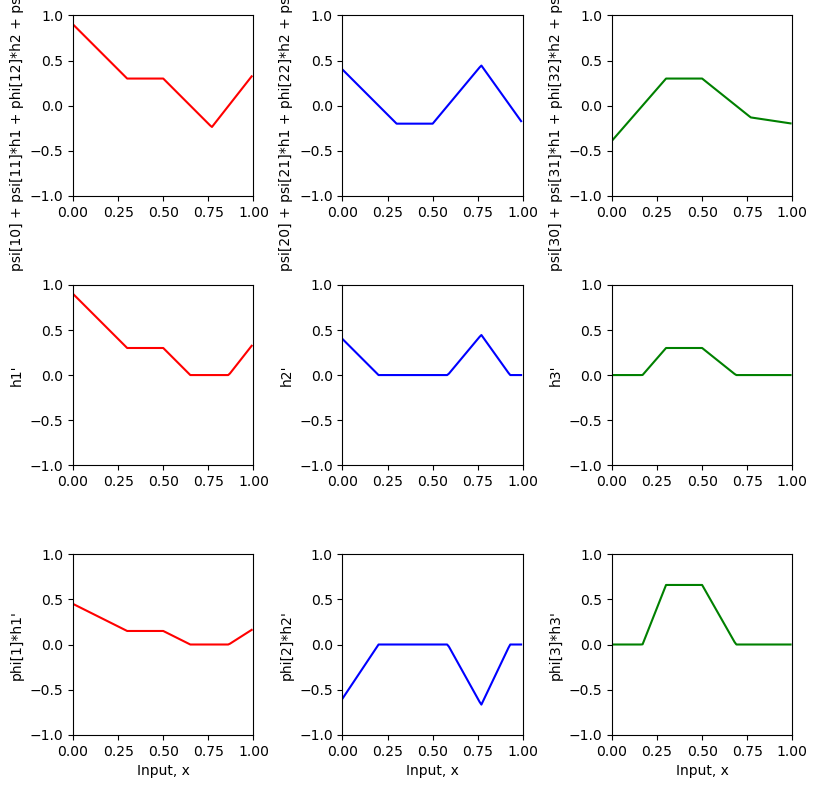

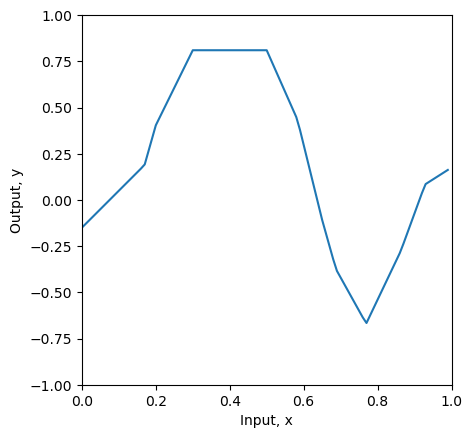

In [8]:
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)     